In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
from glob import glob
from scipy import optimize
from hampel import hampel

# %matplotlib notebook
plt.style.use('dark_background')
color = ['#8dd3c7','#feffb3','#bfbbd9','#fa8174','#81b1d2','#fdb462','#b3de69','#bc82bd','#ccebc4','#ffed6f']





In [122]:
def mt_fit_simple(func,data_x,data_y,err_x ,err_y,N):
    
    parass = []
    errss = []
    for i in range(N):
#         data_xe = np.array(data_x)+np.random.normal(0,err_x)
#         data_ye = np.array(data_y)+np.random.normal(0,err_y)

        data_xe = np.random.normal(data_x,err_x)
        data_ye = np.random.normal(data_y,err_y)
#         print(data_ye)

        paras, errs = optimize.curve_fit(func, data_xe, data_ye,)
#         print(parass)
        parass += [paras]
        errss += [errs]
        
    return (np.array(parass), np.array(errss))

In [51]:
data = pd.read_csv('/Users/wendy/Desktop/111/GMA/PMT_gain.csv')
volt = data['Voltage_(V)'].values
loc = data['Peak_location'].values
err = data['Peak_error'].values

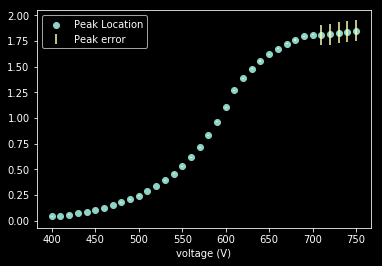

In [52]:
fig,ax = plt.subplots()

ax.scatter(volt,loc,label = 'Peak Location')
ax.errorbar(volt,loc,err,label = 'Peak error',color = color[1],ls = 'none')
ax.set_xlabel('voltage (V)')
plt.legend()

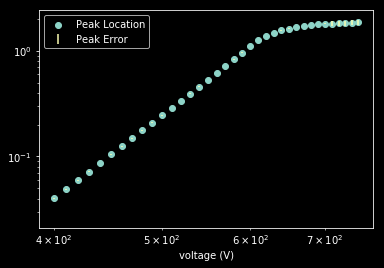

In [53]:
fig,ax = plt.subplots()

ax.scatter(volt,loc,label = 'Peak Location')
ax.set_xlabel('voltage (V)')
ax.errorbar(volt,loc,err,label = 'Peak Error',color = color[1],ls = 'none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()

In [54]:
amplines = '/Users/wendy/Desktop/111/GMA/amp_lines.csv'
data_lines = pd.read_csv(amplines)

In [55]:
l1645 = data_lines[:10]
l1640 = data_lines[10:]

In [62]:
data_nl = pd.read_csv('/Users/wendy/Desktop/111/GMA/amp_linear.csv')

In [83]:
v_inn = data_nl['Volt_in'].values[:-1]
peak_loc = data_nl['Peak_location'].values[:-1]
peak_loc = peak_loc.astype(float)
peak_err = data_nl['Error'].values[:-1]

In [86]:
peak_err

array([0.005, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001])

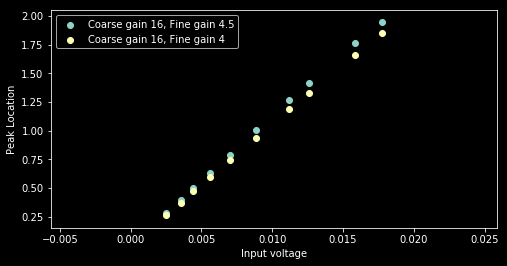

In [123]:
fig, ax = plt.subplots(figsize = (8,4))
V_in = l1645['input_voltage'].values
V_out = l1645['output'].values
V_err = l1645['error '].values
ax.scatter(V_in, V_out,color = color[0],label = 'Coarse gain 16, Fine gain 4.5')
ax.errorbar(V_in,V_out,V_err,color = color[0],ls = 'none')

V_in = l164['input_voltage'].values
V_out = l164['output '].values
V_err = l164['error '].values
ax.scatter(V_in, V_out,color = color[1],label = 'Coarse gain 16, Fine gain 4')
ax.errorbar(V_in,V_out,V_err,color = color[1],ls = 'none')

# ax.scatter(v_inn,peak_loc,color = color[2],label = 'Coarse gain 16, Fine gain 2.5')
# ax.errorbar(v_inn,peak_loc,peak_err,color = color[1],ls = 'none')
# ax.errorbar(v_inn,peak_loc,peak_err)#,color = color[2],ls = 'none')

ax.set_xlabel("Input voltage")
ax.set_ylabel("Peak Location")

ax.legend()

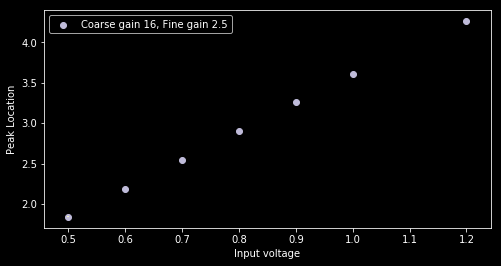

In [144]:
fig, ax = plt.subplots(figsize = (8,4))
# V_in = l1645['input_voltage'].values
# V_out = l1645['output'].values
# V_err = l1645['error '].values
# ax.scatter(V_in, V_out,color = color[0],label = 'Coarse gain 16, Fine gain 4.5')
# ax.errorbar(V_in,V_out,V_err,color = color[0],ls = 'none')

# V_in = l164['input_voltage'].values
# V_out = l164['output '].values
# V_err = l164['error '].values
# ax.scatter(V_in, V_out,color = color[1],label = 'Coarse gain 16, Fine gain 4')
# ax.errorbar(V_in,V_out,V_err,color = color[1],ls = 'none')

ax.scatter(v_inn,peak_loc,color = color[2],label = 'Coarse gain 16, Fine gain 2.5')
ax.errorbar(v_inn,peak_loc,peak_err,color = color[1],ls = 'none')

# xx = np.linspace(min(v_inn)-0.1,max(v_inn)+0.1,100)
# ax.plot(xx,linear(xx,slope, intercept),color = color[0])
# # ax.errorbar(v_inn,peak_loc,peak_err)#,color = color[2],ls = 'none')
# chi = chisquared(peak_loc,linear(v_inn,slope, intercept),peak_err)

# ax.text(0.4,4,r'$\chi^2$={:.2g}'.format(chi))

ax.set_xlabel("Input voltage")
ax.set_ylabel("Peak Location")

ax.legend()

In [142]:
chi

192.04274586993597

In [140]:
def linear(x,a,b,):
    return(a*x+b)
def chisquared(obs,model,err):
    return(np.average((obs-model)**2/err**2))

In [129]:
paras, errs = mt_fit_simple(linear, v_inn,peak_loc,0.0,peak_err,1000)

In [132]:
slope = np.mean(paras[:,0])
s_err = np.mean(errs[:,0])

intercept = np.mean(paras[:,1])
i_err = np.mean(errs[:,1])

In [113]:
good_dat = '/Users/wendy/Desktop/111/GMA/Wendy&Yilun/amp_linearity(4)/01_26_2022_16_17_49/01_26_2022_16_19_11.dat'
path_nldat = '/Users/wendy/Desktop/111/GMA/Wendy&Yilun/amp_linearity(4)/01_26_2022_16_29_41/01_26_2022_16_30_21.dat'

In [114]:
gdat = pd.read_csv(good_dat,skiprows = 2,sep="\s+", header = None,usecols = [0,1])
nldat = pd.read_csv(path_nldat,skiprows = 2,sep="\s+", header = None,usecols = [0,1])

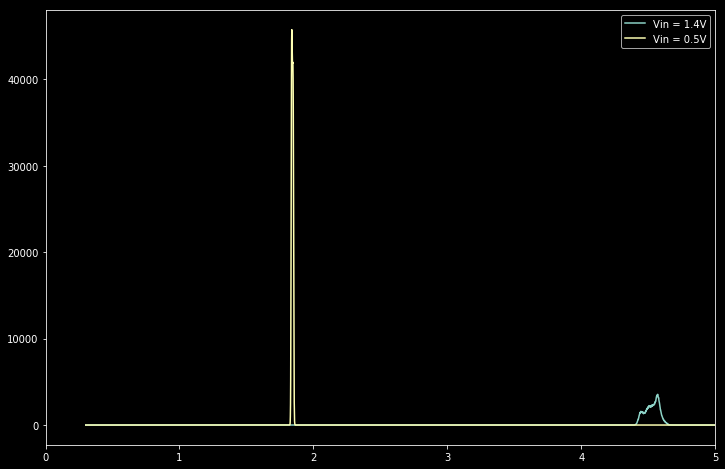

In [121]:
freq = nldat[0]
vals = nldat[1]

freq1 = gdat[0]
vals1 = gdat[1]

fig,ax = plt.subplots(figsize = (12,8))
ax.plot(freq,vals,label = 'Vin = 1.4V')
ax.plot(freq1,vals1,label = 'Vin = 0.5V')
ax.set_xlim(0,5)
plt.legend()